# AS.171.205: Beautiful Data: Introduction to Practical Data Science
## Teacher: Alex Szalay
## Fall 2015
See also: http://www.sdss.jhu.edu/~szalay/class/2015/data.htm

For data files see:http://www.sdss.jhu.edu/~szalay/class/2015/data/

### Homework 2.2
http://www.sdss.jhu.edu/~szalay/class/2015/Homework-2.pdf

The file atacama-2012-sample.csv contains hourly measurements from various sensors
from the Atacama desert in Chile. The sensors sco3 and sco4 measure the CO2 concentration
in part per million (ppm), uncorrected for the high altitude (Atacama is at 16,000 ft, and the air
pressure is about half of the sea-level one). The columns st5 and st6 are the outside
temperature from two sensors in oC. The time is displayed in different granularities (hours from
the beginning of the experiment, hours within each day, day from the beginning of the
experiment. There is a glitch in the CO2 sensor values on day 70, ignore those values (set them
to zero).
The expression below defines the cross-correlation between two different time-series a and b.

$$ C_{ab}(\tau)=\frac{1}{N}\sum_t (a(t)- \langle a\rangle) (b(t+\tau)-\langle b\rangle))  $$

Here N is the number of measurements included in the sum, $\langle a\rangle $ and $\langle b \rangle $ are the averages of
the two series.
1. Compute the temporal autocorrelation function of both the average temperature and
the average CO2 concentration, out to 48 hours.
1. Compute the temporal cross-correlation function between the average temperature
and the average CO2 concentration, out to 48 hours.
1. Consider the time series of the two temperature sensors. Break these into daily vectors,
and compute the top 3 principal components. Guess the meaning of each component.
Expand each vector on the basis of the top 3 components. Interpret the result

In [120]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [121]:
atacama=pandas.read_csv('atacama-hourly-sample.csv')
# use loc to set values on original
atacama.loc[atacama.days==70,'c3']=0
atacama.loc[atacama.days==70,'c4']=0
h=atacama['hours']
st5=atacama['t5']
st6=atacama['t6']
co3=atacama['c3']
co4=atacama['c4']
#co4.loc[atacama.days==70]=0

_st5=sum(st5)/len(st5)
_st6=sum(st6)/len(st6)
_co3=sum(co3)/len(co3)
_co4=sum(co4)/len(co4)


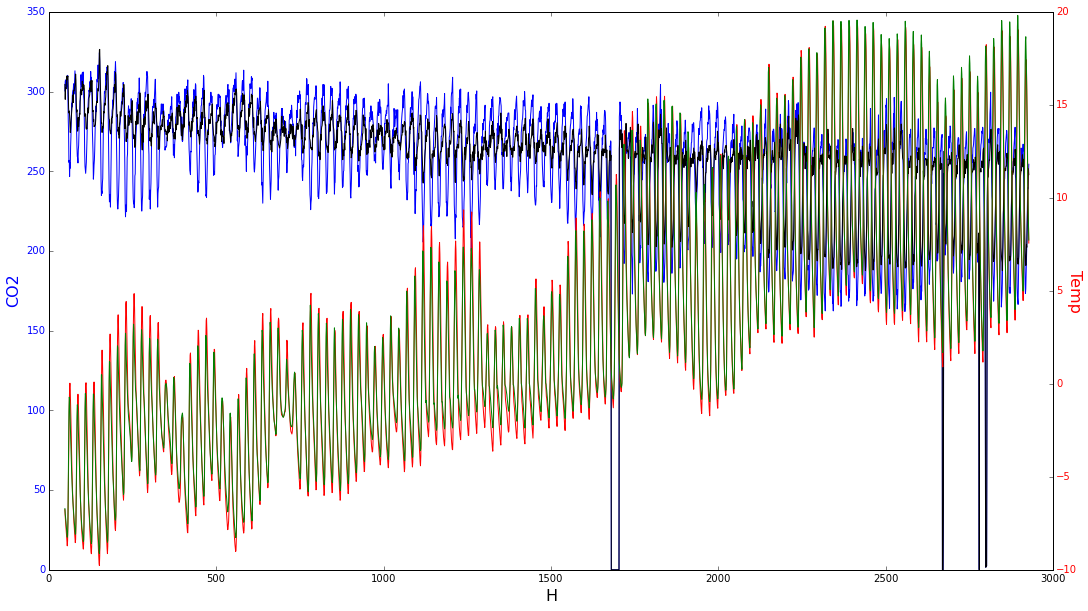

In [122]:
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 10, forward=True)
ax1.plot(h, co3, 'b-')
ax1.plot(h, co4, 'black')
ax1.set_xlabel('H',fontsize=16)
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('CO2', color='b',fontsize=16)
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(h, st5, 'r')
ax2.plot(h, st6, 'g')
y=ax2.set_ylabel('Temp', color='r',fontsize=16)
y.set_rotation(-90)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [123]:
n=len(co3)
ac=pandas.DataFrame()

ac['tau']=list(range(50))
ac['co3']=list(range(50))
ac['co4']=list(range(50))
ac['st5']=list(range(50))
ac['st6']=list(range(50))
ac['c3c4']=list(range(50))
ac['c3s5']=list(range(50))
for m in ac['tau']:
    ac.loc[m,'co3'] = sum((co3-_co3)[:(n-m)]*np.roll(co3-_co3,m)[:(n-m)])/(n-m)
    ac.loc[m,'co4'] = sum((co4-_co4)[:(n-m)]*np.roll(co4-_co4,m)[:(n-m)])/(n-m)
    ac.loc[m,'st5'] = sum((st5-_st5)[:(n-m)]*np.roll(st5-_st5,m)[:(n-m)])/(n-m)
    ac.loc[m,'st6'] = sum((st6-_st6)[:(n-m)]*np.roll(st6-_st6,m)[:(n-m)])/(n-m)
    ac.loc[m,'c3c4'] = sum((co3-_co3)[:(n-m)]*np.roll(co4-_co4,m)[:(n-m)])/(n-m)
    ac.loc[m,'c3s5'] = sum((co3-_co3)[:(n-m)]*np.roll(st5-_st5,m)[:(n-m)])/(n-m)

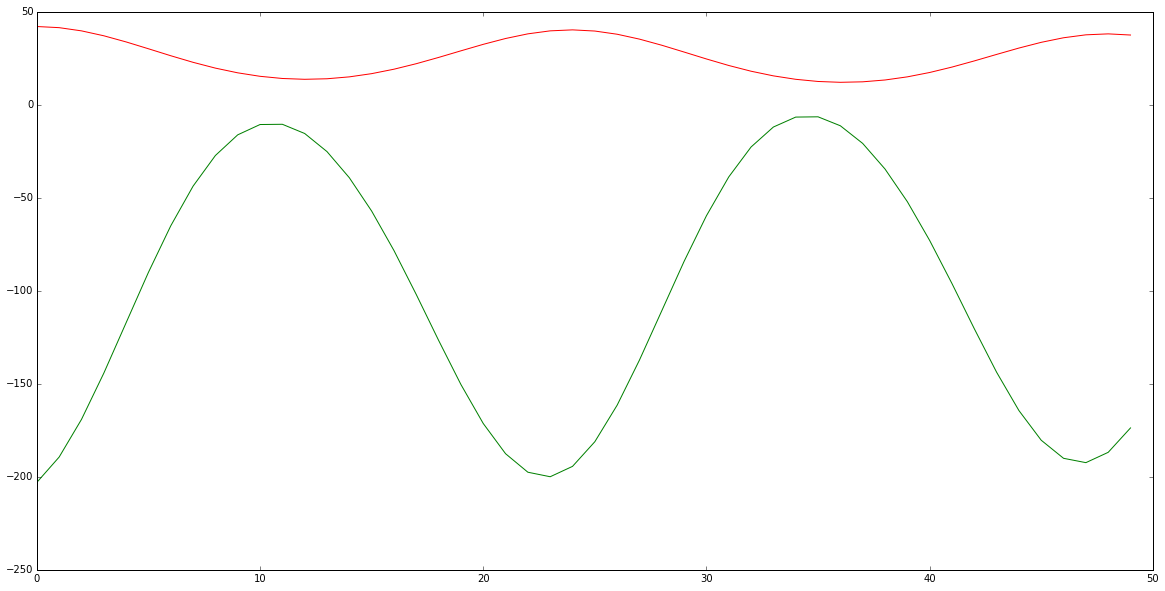

In [132]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10, forward=True)

#plt.plot(ac['tau'],ac['co3'],c='black')
#plt.plot(ac['tau'],ac['c3c4'],c='blue')
plt.plot(ac['tau'],ac['st5'],c='red')
plt.plot(ac['tau'],ac['c3s5'],c='green')
plt.show()

In [125]:
## PCA on daily temperatures
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [126]:
_t5=np.reshape(np.array(atacama['t5']),(-1,24))
_ata=atacama.groupby('days').mean()
_ata.index

Int64Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11, 
            ...
            112, 113, 114, 115, 116, 117, 118, 119, 120, 121],
           dtype='int64', name='days', length=120)

In [127]:
pca = PCA(n_components=3,whiten=False)
pca.fit(_t5)

PCA(copy=True, n_components=3, whiten=False)

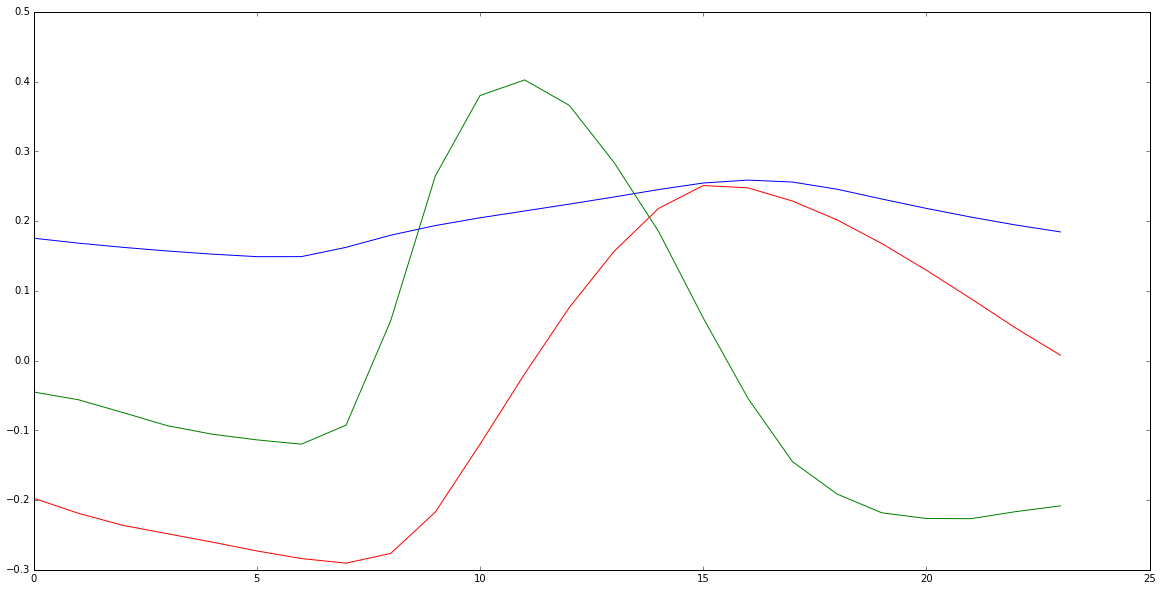

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10, forward=True)
#plt.plot(pca.mean_,c='black')
plt.plot(pca.components_[0],c='blue')
plt.plot(pca.components_[1],c='red')
plt.plot(pca.components_[2],c='green')
plt.show()

In [95]:
amps=np.dot((_t5-pca.mean_),pca.components_.T)
ampsT=amps.T

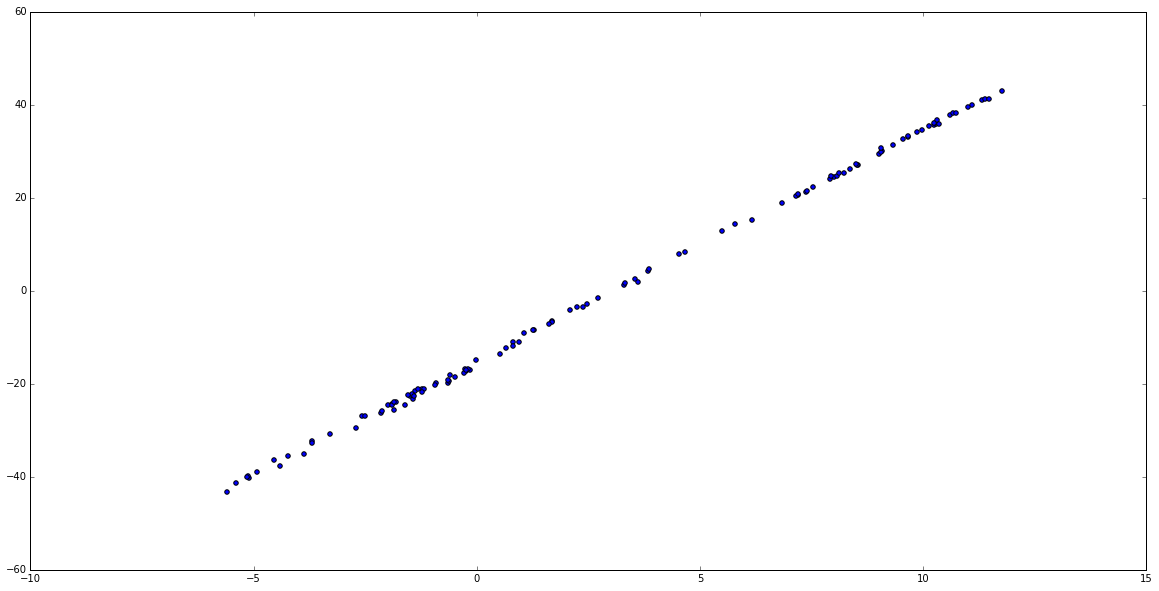

In [131]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10, forward=True)
#plt.plot(pca.mean_,c='black')
#plt.scatter(ampsT[0],ampsT[1])
#plt.scatter(_ata.index,ampsT[0])
plt.scatter(_ata['t5'],ampsT[0])
plt.show()